In [1]:
# Change Python path
import os, sys
os.chdir("/LOCALDATA/ARTHURs_FILES/Codigos/")
print(os.getcwd())
sys.path.append('python_modules')

# Enables modules autoreload (important during development)
%load_ext autoreload
%autoreload 2

/LOCALDATA/ARTHURs_FILES/Codigos


In [2]:
from data_managers.load_dataset import load_dragonera_insitu
import pandas as pd

ds_dragonera_insitu = load_dragonera_insitu()
ds_dragonera_insitu

<xarray.Dataset> Size: 3MB
Dimensions:                          (time: 137708)
Coordinates:
  * time                             (time) datetime64[ns] 1MB 2009-08-14T06:...
Data variables:
    T                                (time) float64 1MB ...
    Canal de obtencion de los datos  (time) float64 1MB ...

In [3]:
from mhws_computers.mhw_computer import compute_mhw_ds

mhwBlock = compute_mhw_ds(ds_dragonera_insitu, var_name="T", lon=2.10, lat=39.56, depth=3)

mhwBlock

<xarray.Dataset> Size: 2kB
Dimensions:               (lon: 1, lat: 1, depth: 1, year: 17)
Coordinates:
  * lon                   (lon) float64 8B 2.1
  * lat                   (lat) float64 8B 39.56
  * depth                 (depth) int64 8B 3
  * year                  (year) int64 136B 2009 2010 2011 ... 2023 2024 2025
Data variables:
    count                 (lon, lat, depth, year) int64 136B 2 6 6 6 ... 12 19 7
    duration              (lon, lat, depth, year) float64 136B 25.0 ... 220.4
    intensity_max         (lon, lat, depth, year) float64 136B 2.021 ... 1.691
    intensity_max_max     (lon, lat, depth, year) float64 136B 3.298 ... 2.881
    intensity_mean        (lon, lat, depth, year) float64 136B 0.7181 ... 1.012
    intensity_var         (lon, lat, depth, year) float64 136B 0.4171 ... 0.1918
    intensity_cumulative  (lon, lat, depth, year) float64 136B 17.31 ... 242.3
    rate_onset            (lon, lat, depth, year) float64 136B 0.1769 ... 0.0...
    rate_decline          (lon, lat, depth, year) float64 136B 0.08964 ... 0....
    total_days            (lon, lat, depth, year) int64 136B 50 126 ... 1543
    total_icum            (lon, lat, depth, year) float64 136B 34.63 ... 1.69...
Attributes:
    description:  MHWs yearly statistics computed using the marineHeatWaves m...

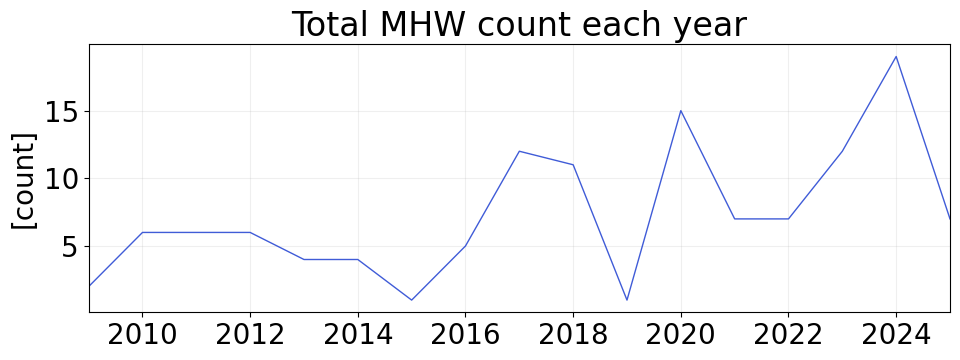

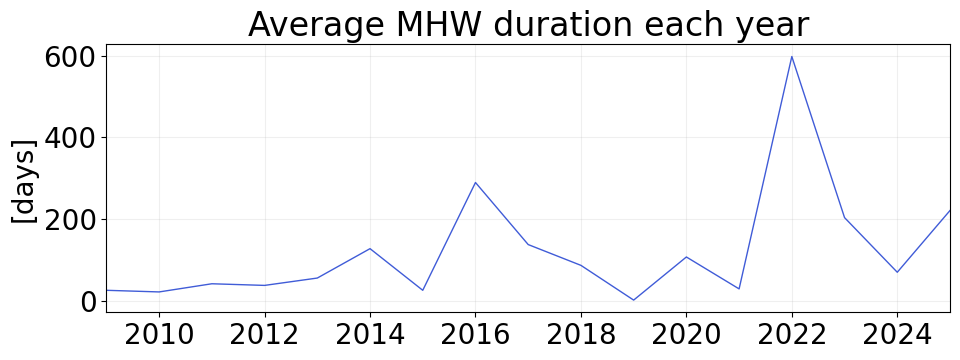

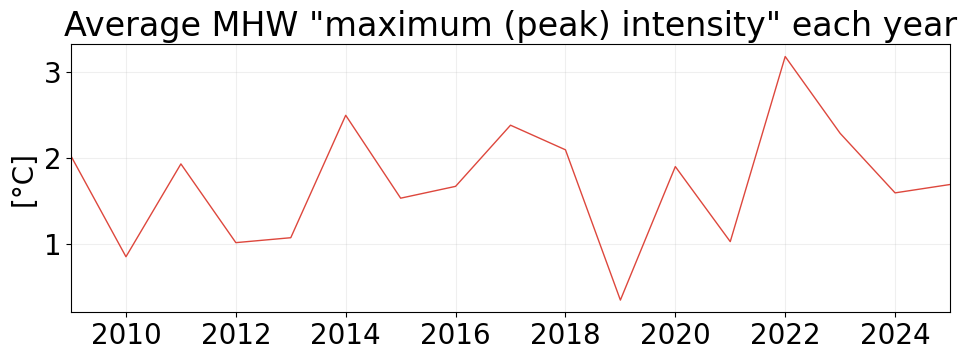

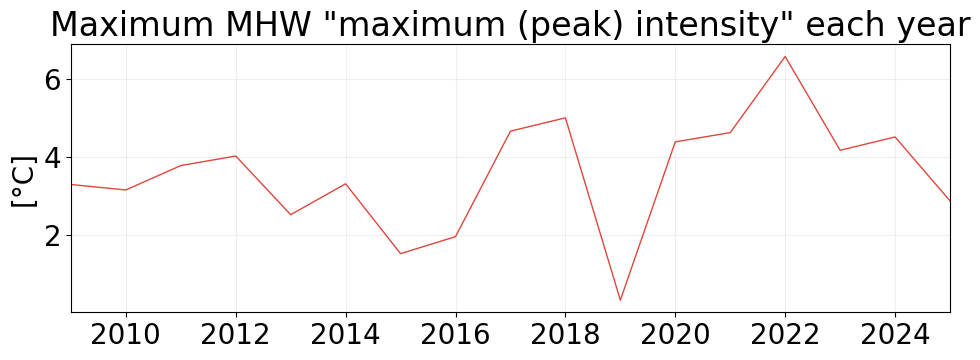

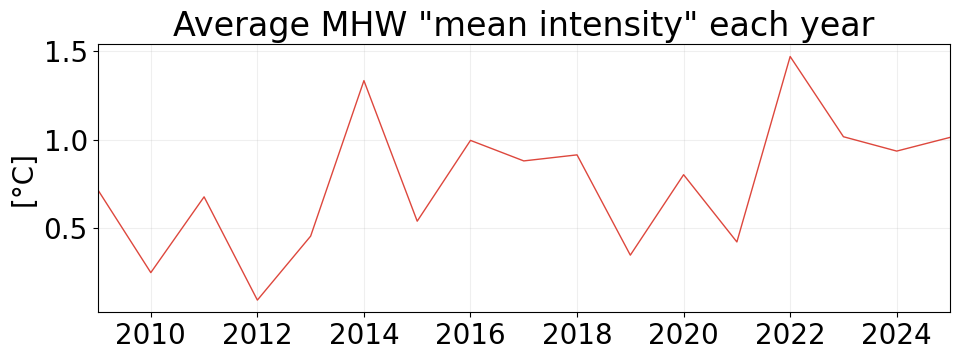

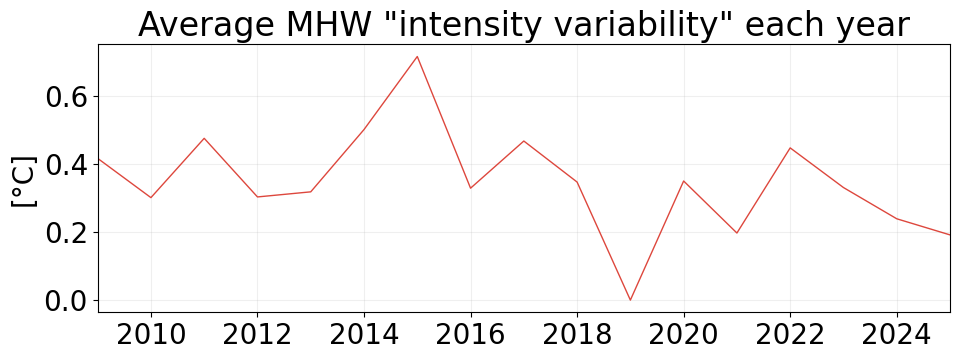

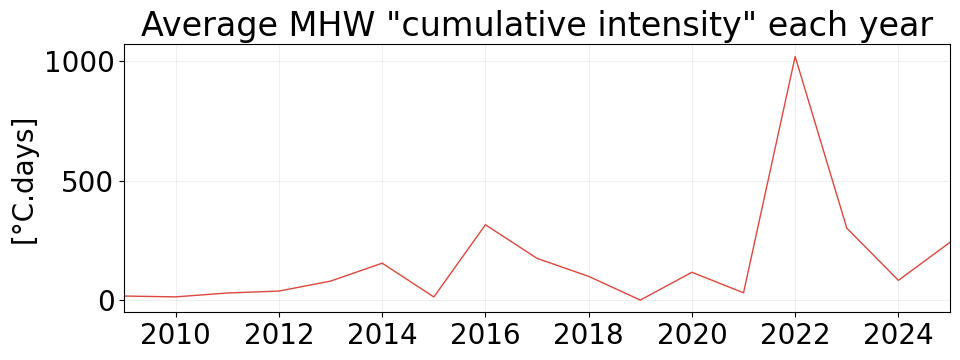

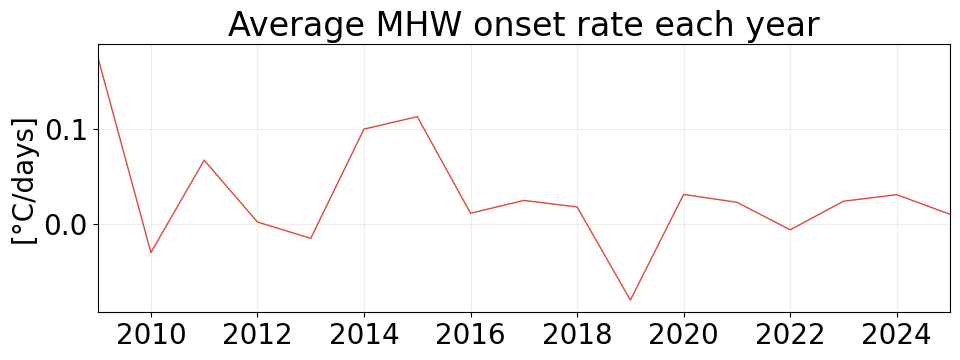

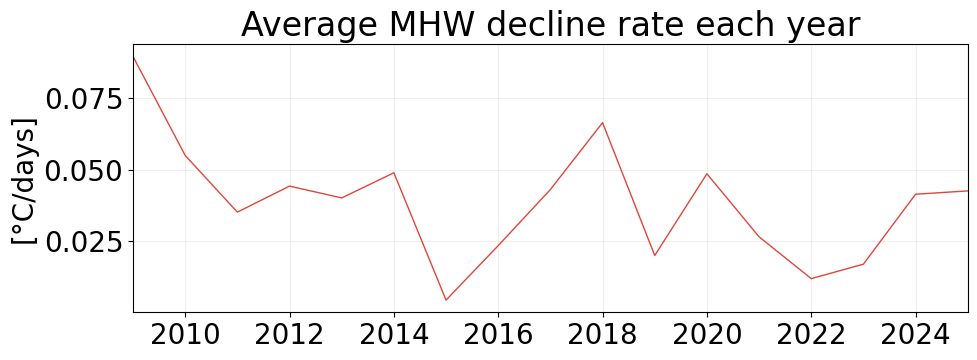

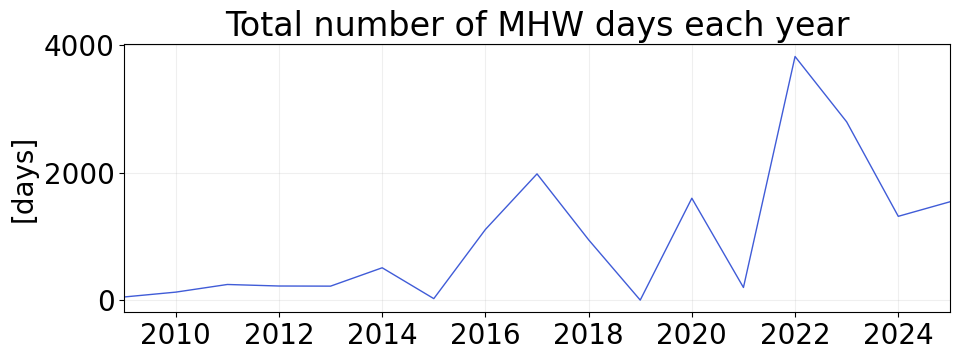

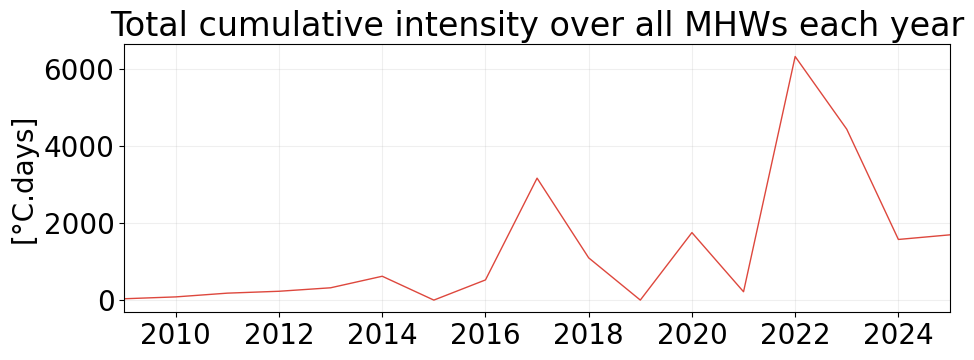

In [26]:
from data_plotters.timeseries_TEMP import plot_timeserie

for stat in mhwBlock.data_vars:
    stat_da = mhwBlock[stat]

    plot_timeserie(
        stat_da.isel(lon=0,lat=0,depth=0),
        stat_da.year,

        colors="#DB3A2FEE" if "°C" in stat_da.unit else "#2A49D3E5",

        figsize=(10,4),
        fontsize=20,
        title=stat_da.longname,
        unit=stat_da.unit,

        xlim=(2009, 2025),

        show_plot=True,
    )